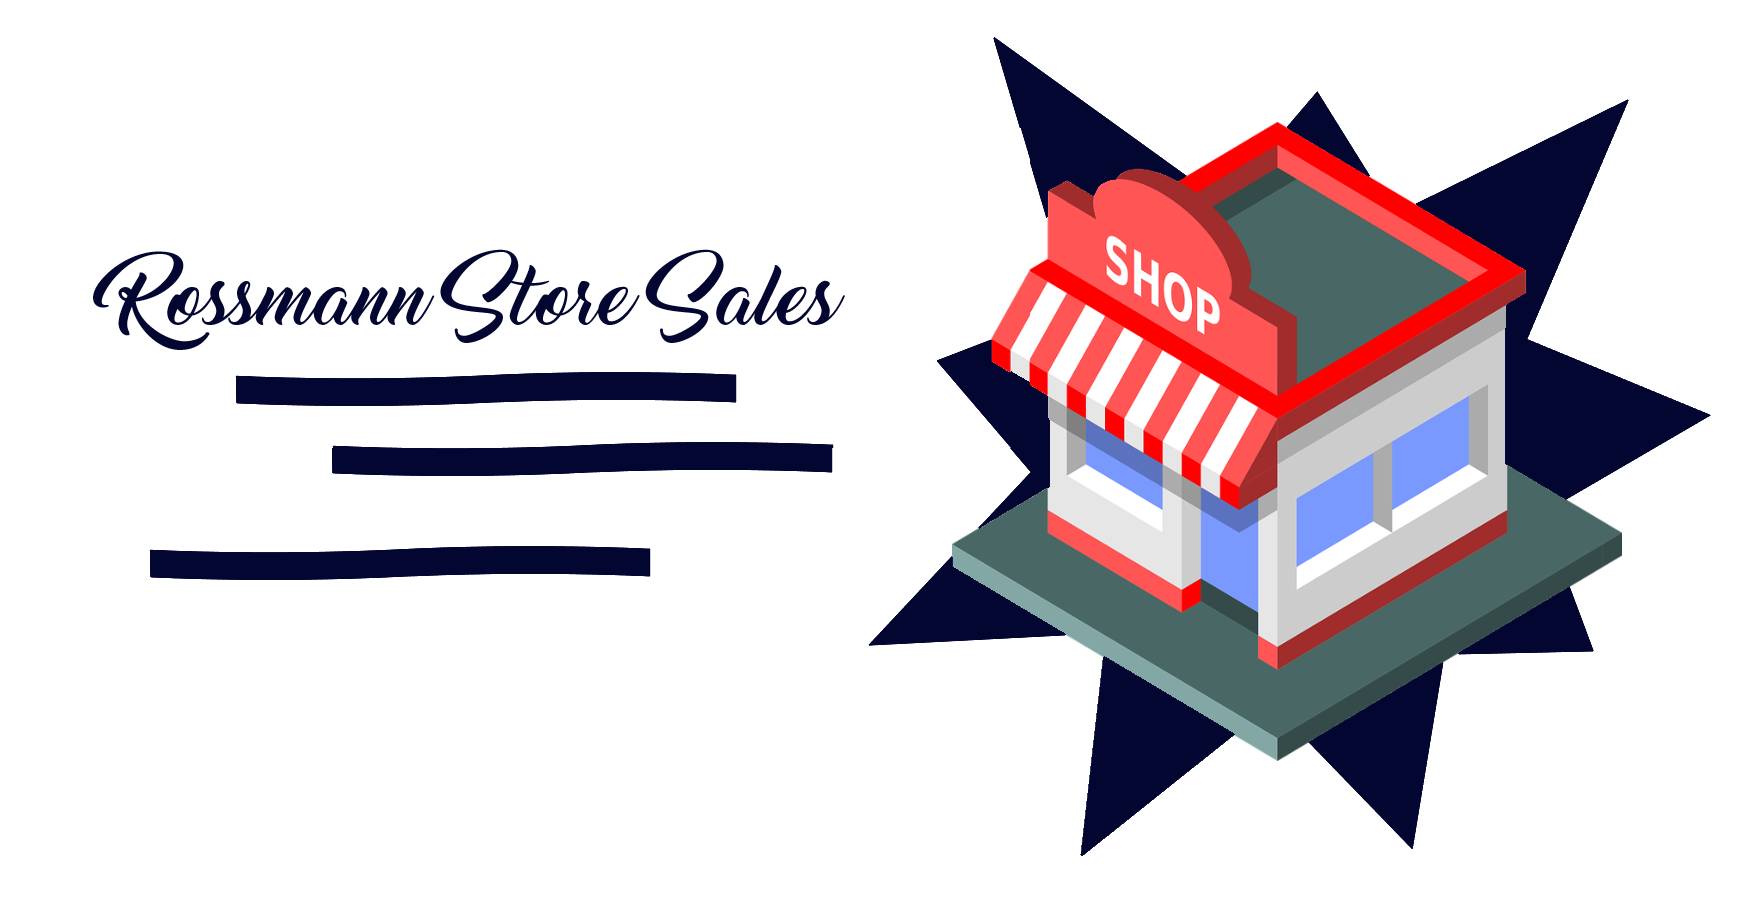

In [63]:
Image("../img/ross.png")

<p style="text-align:center;">Rossmann History.</p>
<p style="text-align:center;"><i>Rossmann are a chain of pharmacies located in Europe, mainly in Germany, with around 56,200 employees and more than 4000 stores. The company was founded by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany.</i> ~ Wiki.</p>

Rossmann CFO on a monthly results meeting asked to all store mananger a sales forecast for the next six monsths.<br>
 - CFO Like to know next sales for start a reform of all shops.

**Pharmaceutical Bussiness Model**<br>
Rossmann is present with an e-commerce and in physical stores available for sales of household items, makeup and of course drugstore items, as it is a chain of pharmacies, it is spread over several parts of Europe, thus being able to select regions with greater growth potential and reducing the competition rate.<br> 'First Assumptions'
 - **Market Size**: All persons over 18 years of age, with preference for older persons.
 - **Marketing Channels**: Rossmann Website & Shops.
 - **Principal Metrics**: 
     - Channel Offline: Working on physical stores.
     - Recency: Purchases over time.
     - Frequency: Shop sales frequency for sales forecast.
     - Market Share: Sales competitions.

1. Do older customers buy more from physical stores or from competitors?
2. What is the marketing investment compared to physical stores in terms of e-commerce?
3. What are the new products that make customers buy from Rossmann stores instead of competing stores?
4. How do these stores behave in terms of receiving new merchandise to sell to new customers?
5. Are the products sold easily accessible?
6. How are the prices of the products in relation to the location of the stores?
7. How are rossmann products and stores being evaluated?
8. What is the buying process like for these customers?
9. Would a customer who bought in a physical store buy again?
10. How much does a customer cost for physical stores?
11. Who are the main partners of the rossmann brand? ...

    Data Info

**Id** - an Id that represents a (Store, Date) duple within the test set<br>
**Store** - a unique Id for each store<br>
**Sales** - the turnover for any given day (this is what you are predicting)<br>
**Customers** - the number of customers on a given day<br>
**Open** - an indicator for whether the store was open: 0 = closed, 1 = open<br>
**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None<br>
**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools<br>
**StoreType** - differentiates between 4 different store models: a, b, c, d<br>
**Assortment** - describes an assortment level: a = basic, b = extra, c = extended<br>
**CompetitionDistance** - distance in meters to the nearest competitor store<br>
**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened<br>
**Promo** - indicates whether a store is running a promo on that day<br>
**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating<br>
**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2<br>
**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 0.0. Imports & Functions

In [2]:
import pickle
import warnings
import datetime
import requests
import inflection
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

from IPython.display  import Image
from matplotlib       import pyplot as plt
from Utils            import metricsAndPlots as mkk

warnings.filterwarnings('ignore')
mp = mkk()

## 0.1. Helper Functions & Plots

In [4]:
df_store = pd.read_csv("../data/store.csv", low_memory=False )
df_train = pd.read_csv("../data/train.csv", low_memory=False )

df_raw = pd.merge( df_train, df_store, on="Store", how="left" )

## 2.0. API Tester

In [499]:
df10 = pd.read_csv("../data/test.csv")

In [500]:
# Test + Dataset Store
df_test = pd.merge( df10, df_store, on='Store', how='left' )
df_test = df_test[df_test['Store'] == 3]

# Remove Closed Days for Test
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop( columns=['Id'], axis=1 )

data = json.dumps( df_test.to_dict( orient='records' ) )

In [417]:
# One of Error -> Checking Error Data CSV of Null promo_since
k  = pd.read_csv('../api/erro_data.csv')
k  = k.drop( columns=['Unnamed: 0'], axis=1 )
k2 = k[k['promo_since'] != '0']
k2['promo_since'] = pd.to_datetime( k2['promo_since'] )

In [502]:
url = 'http://192.168.2.5:5000/rossmann/predict'
header = {'Content-type':'application/json'}

r = requests.post( url, data=data, headers=header )
print( f'Status Code: {r.status_code}')

Status Code: 200


In [503]:
x = pd.merge( df10, df_store, on='Store', how='left' )
x = x[x['Store'] == 3]
x[['Store', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']].head()

,Store,Date,Open,Promo,StateHoliday,SchoolHoliday
1,3,2015-09-17,1.0,1,0,0
857,3,2015-09-16,1.0,1,0,0
1713,3,2015-09-15,1.0,1,0,0
2569,3,2015-09-14,1.0,1,0,0
3425,3,2015-09-13,0.0,0,0,0


In [504]:
y = pd.DataFrame(r.json())[['store', 'date', 'open', 'promo', 'state_holiday', 'school_holiday', 'prediction']]
y.head()

,store,date,open,promo,state_holiday,school_holiday,prediction
0,3,2015-09-17T00:00:00.000Z,1.0,1,0,0,5953.496582
1,3,2015-09-16T00:00:00.000Z,1.0,1,0,0,6098.198242
2,3,2015-09-15T00:00:00.000Z,1.0,1,0,0,6593.803711
3,3,2015-09-14T00:00:00.000Z,1.0,1,0,0,7381.640625
4,3,2015-09-12T00:00:00.000Z,1.0,0,0,0,3653.109131


In [505]:
result = y[['store', 'prediction']].groupby( 'store' ).sum().reset_index()

for i in range( len( result ) ):
    print('Store Number: {}, will sell R$: {:,.2f}'.format( result.loc[i, 'store'], result.loc[i, 'prediction'] ) )

Store Number: 3, will sell R$: 215,197.06


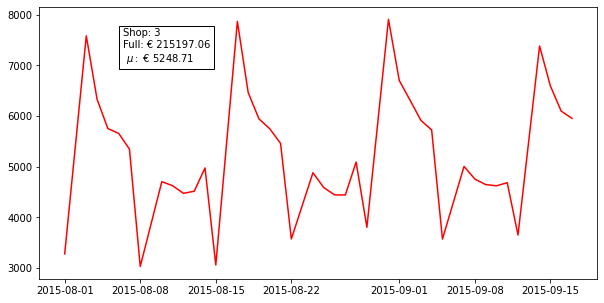

In [507]:
y['date'] = pd.to_datetime( y['date'] )

y_mean = '€ '+ str( np.round( y['prediction'].mean(), 2 ) )
tot    = '€ '+ str( np.round( y['prediction'].sum(), 2) )
text   = f"Shop: {result.loc[i, 'store']}\nFull: {tot}\n $\mu:$ {y_mean}"

fig, ax = plt.subplots( figsize=(10, 5))
ax.plot( y['date'], y['prediction'], color='r' )
ax.text(.15, .8, text, bbox={'facecolor':'white'},transform=ax.transAxes);
#ax.xticks( rotation=35 );
#plt.savefig( 'saleforecast.png' )